<a href="https://colab.research.google.com/github/leonarddocchagas/data_science/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://github.com/leonarddocchagas/data_science/blob/master/projetos/_imagens/logo-airbnb.png?raw=true">

## Dados coletados da Gigante Hoteleira
**Analisando dados da Cidade do Rio de Janeiro**


A startup é considerada uma das maiores empresa no ramo da hotelaria e **sem possuir um hotel** se quer! 
A grande ideia foi conectar pessoas que queriam receber hospedes e pessoas com desejo de hopedagem a baixo custo.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

# Sobre os dados

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


## Carregando bibliotecas e dados

In [1]:
# bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importa arquivo listings.csv para dataframe
df = pd.read_csv('http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv')

In [3]:
# exibi as 5 primerias linhas do dataframe
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,Very Nice 2Br - Copacabana - WiFi,68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,218,5,251,2020-04-06,2.11,1,0
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,422,5,94,2020-03-22,1.25,1,69
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,158,7,238,2020-02-15,1.98,3,95
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,342,2,282,2020-03-02,2.37,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,479,2,181,2020-03-15,2.29,1,358


###**Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [14]:
# quantidade de entradas e atributos
print('Entradas: {}' .format(df.shape[0]))
print('Atributos: {}\n' .format(df.shape[1]))

# tipo dos dados
display(df.dtypes)

Entradas: 35870
Atributos: 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

###**Q2. Qual a porcentagem de valores ausentes no dataset?**
Valores ausentes pode causar uma tremenda dor de cabeça. Então logo no início é importante identificar e tratar.

In [25]:
# % dados faltantes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.411653
last_review                       0.411653
name                              0.001617
host_name                         0.000139
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

###**Q3. Qual o tipo de distribuição das variáveis?**

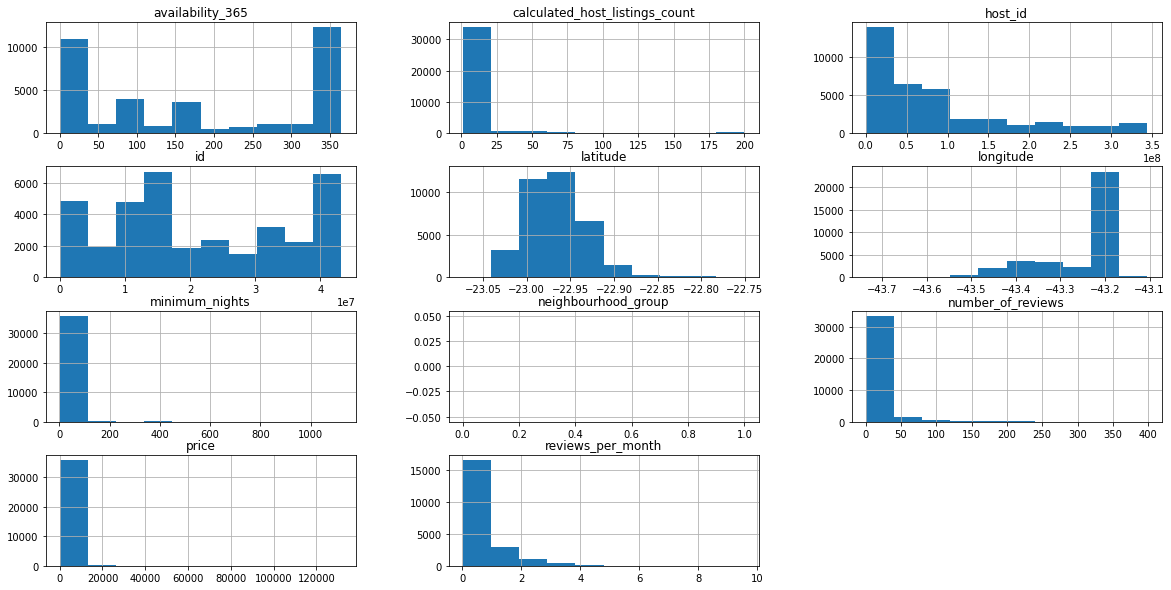

In [34]:
df.hist(bins=10, figsize=(20, 10));

### **Q4. Há *outliers* presentes?**

In [35]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35870.000000,35870.000000,35870.000000,21104.000000,35870.000000,35870.000000
mean,753.686367,4.781851,9.822972,0.652248,6.613995,180.371815
std,2229.366334,22.471085,25.827647,0.823388,22.769663,152.510778
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,158.000000,1.000000,0.000000,0.130000,1.000000,0.000000
50%,298.000000,2.000000,1.000000,0.340000,1.000000,178.000000
75%,632.000000,4.000000,6.000000,0.830000,3.000000,363.000000
max,131727.000000,1123.000000,399.000000,9.570000,200.000000,365.000000


#### Boxplot para minimum_nights

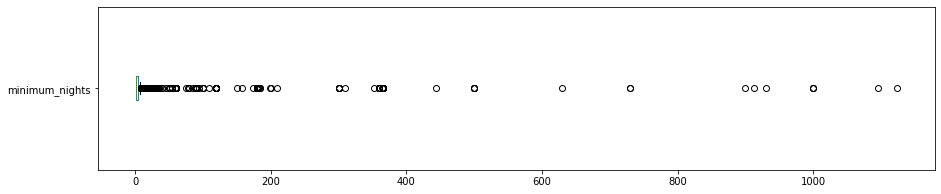

minimum_nights: valores acima de 30:
224 entradas
0.6245%


In [36]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Histogramas sem *outliers*

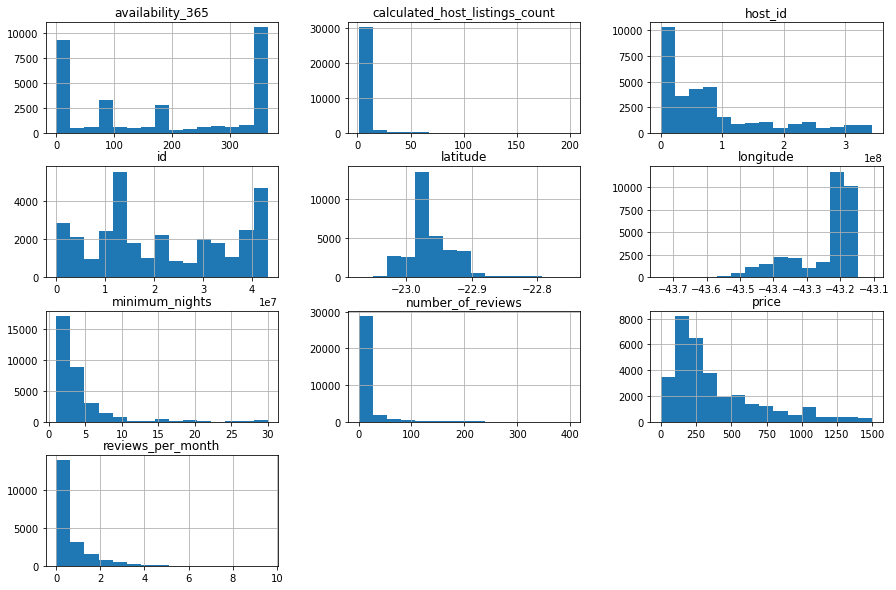

In [37]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

###**Q4. Qual a correlação existente entre as variáveis**

In [38]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.163318,-0.162241,-0.162366,0.047043,-0.015328
minimum_nights,0.163318,1.000000,-0.059857,-0.080109,-0.033148,-0.016418
number_of_reviews,-0.162241,-0.059857,1.000000,0.645518,-0.026347,0.050653
reviews_per_month,-0.162366,-0.080109,0.645518,1.000000,-0.013855,-0.020716
calculated_host_listings_count,0.047043,-0.033148,-0.026347,-0.013855,1.000000,0.073733
availability_365,-0.015328,-0.016418,0.050653,-0.020716,0.073733,1.000000


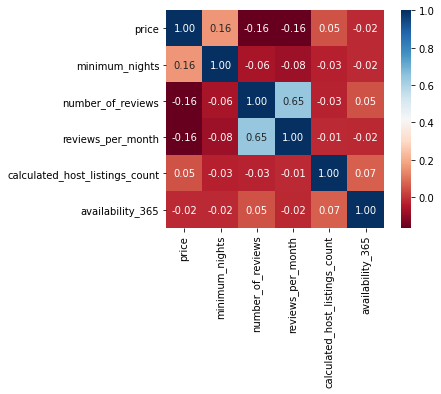

In [39]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

###**Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [45]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    22418
Private room        8969
Shared room          765
Hotel room           160
Name: room_type, dtype: int64

In [47]:
# mostrar em percentual
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.693798
Private room       0.277575
Shared room        0.023675
Hotel room         0.004952
Name: room_type, dtype: float64

###**Q6. Qual a localidade mais cara do Rio?**



In [55]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Vaz Lobo                  875.666667
Engenheiro Leal           800.000000
Ricardo de Albuquerque    601.200000
Paciência                 523.555556
Lagoa                     522.097859
Abolição                  483.666667
Leblon                    479.767359
Anchieta                  475.600000
Deodoro                   474.000000
Joá                       472.382979
Name: price, dtype: float64

In [61]:
# consultado quantidade de imoveis do Vaz Lobo
df_clean[df_clean['neighbourhood'] == 'Vaz Lobo'].shape

(3, 15)

In [65]:
# exibir dataset Vaz Lobo
df_clean[df_clean['neighbourhood'] == 'Vaz Lobo']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2908,2768499,Próximo ao Maracanã,14157867,Fernando,Vaz Lobo,-22.85955,-43.32918,Private room,1000,1,0,NaN,NaN,1,0
15776,14221134,"casa colonial 3 quartos, garagem",86402266,Lucia,Vaz Lobo,-22.85583,-43.32441,Entire home/apt,1329,15,0,NaN,NaN,1,365
33803,42012781,Casas flegler,332881900,Igor Flegler De Souza,Vaz Lobo,-22.86070,-43.32446,Private room,298,1,0,NaN,NaN,1,362


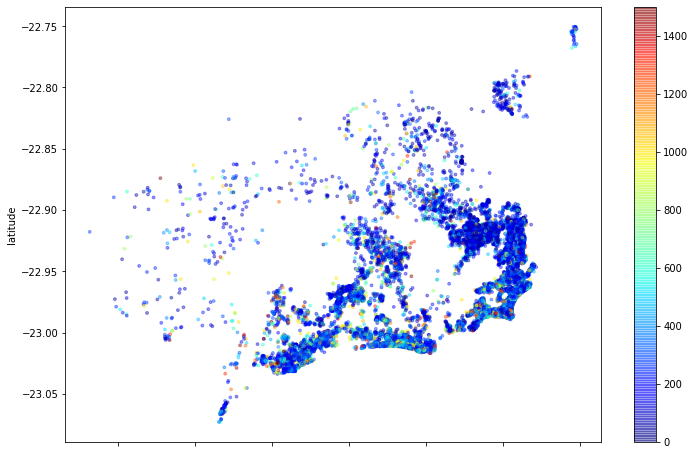

In [66]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));